### INFO284 Machine Learning Exam, spring 2024 
Przybys & Peter


### Table of contents
1. [Introduction](#introduction)
2. [Project Setup](#project-setup)
2. [Exploring Data](#exploring-data)
3. [Data Preprocessing](#data-preprocessing)
4. [Feature Engineering](#feature-engineering)
5. [Modeling](#modeling)
6. [Evaluation](#evaluation)
7. [Conclusion](#conclusion)
8. [References](#references)


### Introduction <a name="introduction"></a> (136)

This report is about machine learning on fisheries data from Norwegian Directorate of Fisheries. The dataset is from 2018 and several of the original columns have already been removed by our lecturer to create a better reference point. The main objective with our models has been to predict the “Rundvekt” continuous values on species “Torsk”, “Sei, and “Hyse”. This is categorized as a quantitative regression problem and our group has been working according to relevant principles within such a problem space. The report will include reasoning for choices made within data exploration, preprocessing, feature engineering, and the use of the specific machine learning models implemented. The project will implement three supervised machine learning models, including one deep learning model. Additionally, we will develop an unsupervised clustering model, for which a distinct data preprocessing approach is permitted.

### Project Setup <a name="project-setup"></a>

##### Importing and versioncontrol for our choosen libraries

In [401]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))

Python version: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.0
IPython version: 8.23.0
scikit-learn version: 1.4.2
seaborn version: 0.13.2


#### Importing the dataset

In [402]:
filePath = 'elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv'
# Keep in mind that the file is encoded in UTF-8 so it will only work if you have the correct version of pandas.
df = pd.read_csv(filePath, encoding="UTF-8" , delimiter=";")
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 45 columns and 305434 rows


In [403]:
def status_dataframe(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    print(f"Datasettet har nå {dataframe.shape[1]} kolonner og {dataframe.shape[0]} rader")
    display(dataframe.head(5))
    dataframe.info()

status_dataframe(df)

Datasettet har nå 45 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

### Exploring Data <a name="exploring-data"></a> (125)


Regarding our problem space we already inherit some knowledge about what datatype we want to work with. So intuitively we know that numerical values will be more relevant than categorical values. It is important not to let this control the data exploration too much, and to take important choices which could be wrong. The data exploration will be about investigating and building the foundation for the reasoning regarding the preprocessing and cleaning of data. At first glance there are 45 columns and 305433 rows. Initially more data is very useful for our deep learning model, but after analyzing various columns there is a large amount of redundancy, 370703 total missing values, wrong datatypes and plenty of categorical data which may not be relevant for us.

In [404]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [406]:
df.isnull().sum().sum()

370703

In [407]:
df.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [408]:
#checking for redundant columns
df.nunique()

Melding ID                  49437
Meldingstidspunkt           44411
Meldingsdato                  366
Meldingsklokkeslett          1440
Starttidspunkt              89322
Startdato                     375
Startklokkeslett             1440
Startposisjon bredde        18063
Startposisjon lengde        35508
Hovedområde start (kode)       56
Hovedområde start              55
Lokasjon start (kode)          83
Havdybde start               2375
Stopptidspunkt              89701
Stoppdato                     366
Stoppklokkeslett             1440
Varighet                     4593
Fangstår                        2
Stopposisjon bredde         18193
Stopposisjon lengde         35871
Hovedområde stopp (kode)       57
Hovedområde stopp              55
Lokasjon stopp (kode)          82
Havdybde stopp               2378
Trekkavstand                31409
Redskap FAO (kode)             31
Redskap FAO                    30
Redskap FDIR (kode)            17
Redskap FDIR                   17
Hovedart FAO (

In [409]:
print(df['Art FAO'].value_counts())
print(df['Art - FDIR'].value_counts())
print(df['Art - gruppe'].value_counts())
print(df['Hovedart FAO'].value_counts())

Art FAO
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - FDIR
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - gruppe
Torsk                                       56574
Annen torskefisk                            45286
Sei                                         42557
Hyse                                        39120
Annen flatfisk, bunnfisk og dypvannsfisk    25267
Ue

dropp kommentarer. except for tekniske ting
vise dataen underveis
dropna, påstander om hvorfor vi dropper de, bevis 
vise distribusjon av outliers
fillNA, groupBy, meldingsid, startstidspunkt
robustScaler, hvorfor vi bruker det, outliers
scalingData for modellene, forklar
gradientBoosting, scaling data hvorfor? Bedre optimum, forklare MultioutputRegressor
MLPR, not converging, learning rate importances
viktig train validation og test splits,
forklare typene features, 
skaleringen fit skal bare være på treningsdataen, skalering skal kun være minste og største verdiene i treningsdataen. 
scaler.fit()transform på treningsdataen
validationset ikke hellig, testdata = helt skjult frem til eksamen.
scaler.fit på testset

#### Choosing target and pre-prossesing
After taking some time to understand the data we have chosen our target features to be the catches of Hyse, Torsk and Sei as continuous values. Next we will pre-prosess the data so it is ready for modeling.

In [410]:
# Using the same seed for testing purposes makes the results more comparable
seed = 32

In [411]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [412]:
# Excluding irrelevant columns

# Fangstår has only 2 unique values
df.drop(columns = ['Fangstår'], inplace= True)

# Lengdegruppe (kode), Lengdegruppe, Bruttotonnasje 1969, Bruttotonnasje annen, Bredde, Fartøylengde all seem to be speaking of the boat doing the catching, with few unique values in each column.
# One of them should be kept as a feature, the rest discarded. We would suggest the most relevant to be Bruttotonasje, which speaks to how much cargo space there is.
# "Bruttotonnasje 1969" and "Bruttotonnasje annen" seem to have nan where the other one has a value, so first we will collapse them into one.
df['Bruttotonnasje'] = df['Bruttotonnasje annen'].combine_first(df['Bruttotonnasje 1969'])
df.drop(columns=['Bruttotonnasje annen', "Bruttotonnasje 1969", "Lengdegruppe", 'Bredde', 'Lengdegruppe (kode)'], inplace=True)

# All columns (kode) in them are cateogrical code representations of another column. For human-readability and to avoid mistaking the code for a continuous value we will remove them.
df.drop(columns=["Hovedområde start (kode)", "Lokasjon start (kode)", "Hovedområde stopp (kode)", "Lokasjon stopp (kode)", "Redskap FAO (kode)", "Redskap FDIR (kode)", "Hovedart FAO (kode)", "Hovedart - FDIR (kode)", "Art FAO (kode)", "Art - FDIR (kode)", "Art - gruppe (kode)", ], inplace = True)

# In both the "Redskap" and "Art" columns you have FAO and FDIR abbriviations. FAO = Food and Agriculture Organization of the United Nations and FDIR = Fiskeridirektoratet
# Due to "Hovedart" onyl having FAO uncoded we will stick to FAO. For the same reason we will remove "Art - gruppe"
df.drop(columns=["Art - gruppe", "Art - FDIR", "Redskap FDIR"], inplace=True)

# The areas where they start and stop have 6 columns. A pair of coordiantes and name of area x2. Since we prefer the continuous features and coordinates=name of place we are removing the name.
df.drop(columns=["Hovedområde start", "Hovedområde stopp"], inplace=True)

# While time of day and date might be relevant we don't need all of them and we don't need to know when it was reported in. For now we will leave start/end date and time.
df.drop(columns=["Meldingsklokkeslett"], inplace=True)

# After trying to transform the remaining time columns into continuous values we could use they seemed to have no other effect on the result then longer prosessing time.
# df.drop(columns=['Startdato', "Startklokkeslett", "Stoppdato", "Stoppklokkeslett"], inplace=True)

In [413]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,00:00,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Sei,134.0,"56,8",1476.0


In [414]:
df.shape

(305434, 23)

In [415]:
status_dataframe(df)

Datasettet har nå 23 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,00:00,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,04:16,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,Sei,134.0,"56,8",1476.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Melding ID            305434 non-null  int64  
 1   Meldingstidspunkt     305434 non-null  object 
 2   Meldingsdato          305434 non-null  object 
 3   Starttidspunkt        305434 non-null  object 
 4   Startdato             305434 non-null  object 
 5   Startklokkeslett      305434 non-null  object 
 6   Startposisjon bredde  305434 non-null  object 
 7   Startposisjon lengde  305434 non-null  object 
 8   Havdybde start        305434 non-null  int64  
 9   Stopptidspunkt        305434 non-null  object 
 10  Stoppdato             305434 non-null  object 
 11  Stoppklokkeslett      305434 non-null  object 
 12  Varighet              305434 non-null  int64  
 13  Stopposisjon bredde   305434 non-null  object 
 14  Stopposisjon lengde   305434 non-null  object 
 15  

count                       305434
mean     0 days 05:45:37.651996830
std      0 days 17:58:05.264515585
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max              111 days 00:00:00
Name: time_difference, dtype: object


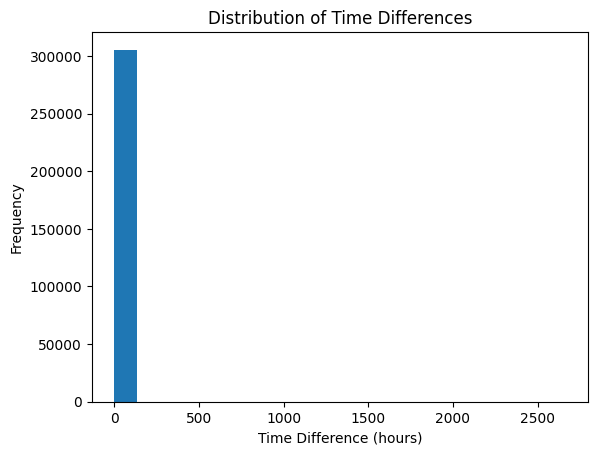

In [416]:
df['date_past'] = pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y')
df['date_future'] = pd.to_datetime(df['Meldingsdato'], format='%d.%m.%Y')

df['time_difference'] = df['date_future'] - df['date_past']

# Analyze the distribution of time differences
time_difference_stats = df['time_difference'].describe()

# Print summary statistics
print(time_difference_stats)

(df['time_difference'] / pd.Timedelta(hours=1)).plot.hist(bins=20)  # Convert to hours for better visualization
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences')
plt.show()

In [417]:
df['time_difference'].value_counts()

time_difference
0 days      234764
1 days       70216
2 days         210
4 days          59
3 days          54
6 days          39
5 days          24
18 days         23
19 days          8
7 days           8
88 days          7
14 days          4
8 days           4
11 days          2
10 days          2
111 days         2
87 days          2
12 days          2
15 days          1
28 days          1
9 days           1
82 days          1
Name: count, dtype: int64

In [418]:
def circular_encoder(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded

In [419]:
def circular_encode(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

df['Startposisjon bredde_sin'], df['Startposisjon bredde_cos'] = circular_encoder(df['Startposisjon bredde'], 180)
df['Startposisjon lengde_sin'], df['Startposisjon lengde_cos'] = circular_encoder(df['Startposisjon lengde'], 360)
df['Stopposisjon bredde_sin'], df['Stopposisjon bredde_cos'] = circular_encoder(df['Stopposisjon bredde'], 180)
df['Stopposisjon lengde_sin'], df['Stopposisjon lengde_cos'] = circular_encoder(df['Stopposisjon lengde'], 360)

df.drop(columns=["Startposisjon bredde", "Startposisjon lengde", 'Stopposisjon bredde', 'Stopposisjon lengde'], inplace=True)
status_dataframe(df)

Datasettet har nå 30 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startklokkeslett,Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje,date_past,date_future,time_difference,Startposisjon bredde_sin,Startposisjon bredde_cos,Startposisjon lengde_sin,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,00:00,-2740,01.01.2018,01.01.2018,00:00,1440,-805,5649.0,"Flytetrål, otter",Antarktisk krill,Antarktisk krill,706714.0,"133,88",9432.0,2018-01-01,2018-01-01,0 days,-0.859852,-0.510543,-0.720950,0.692987,-0.858960,-0.512043,-0.721156,0.692773
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,-335,31.12.2017 04:16,31.12.2017,04:16,295,-334,3970.0,"Bunntrål, otter",Hyse,Hyse,9594.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,-335,31.12.2017 04:16,31.12.2017,04:16,295,-334,3970.0,"Bunntrål, otter",Hyse,Torsk,8510.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,-335,31.12.2017 04:16,31.12.2017,04:16,295,-334,3970.0,"Bunntrål, otter",Hyse,Blåkveite,196.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,23:21,-335,31.12.2017 04:16,31.12.2017,04:16,295,-334,3970.0,"Bunntrål, otter",Hyse,Sei,134.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                305434 non-null  int64          
 1   Meldingstidspunkt         305434 non-null  object         
 2   Meldingsdato              305434 non-null  object         
 3   Starttidspunkt            305434 non-null  object         
 4   Startdato                 305434 non-null  object         
 5   Startklokkeslett          305434 non-null  object         
 6   Havdybde start            305434 non-null  int64          
 7   Stopptidspunkt            305434 non-null  object         
 8   Stoppdato                 305434 non-null  object         
 9   Stoppklokkeslett          305434 non-null  object         
 10  Varighet                  305434 non-null  int64          
 11  Havdybde stopp            305434 non-null  int64    

In [420]:
df.shape

(305434, 30)

In [421]:
#checking the average difference in values between Startposisjon bredde_sin minus Startposisjon bredde_cos

df['Startposisjon bredde_sin'].mean() - df['Stopposisjon bredde_sin'].mean()


0.00010695877630761963

In [422]:
df['Startposisjon bredde_cos'].mean() - df['Stopposisjon bredde_cos'].mean()


1.8825777579389857e-05

In [423]:
df['Startposisjon lengde_sin'].mean() - df['Stopposisjon lengde_sin'].mean()

-0.0005189167355296731

In [424]:
df['Startposisjon lengde_cos'].mean() - df['Stopposisjon lengde_cos'].mean()

-2.3211062993411247e-05

In [425]:
# After having checked to see what % of each column had nan values we decided just to drop them as at worst they were around 1.6 %
df = df.dropna()

In [426]:
df.shape

(297281, 30)

In [427]:
# Focusing down on the species we want to investigate
df = df[df['Art FAO'].isin(['Torsk', 'Sei', 'Hyse'])]

In [428]:
# Removing parts of columns

# From varighet we remove anyting above 400 as according to lecturer that is in the high range of how long you would be fishing in a session.
# So we will consider them outliers or multiple sessions reported as one and exclude them for now.

df = df[df['Varighet'] <= 400]

# Removing outliers from "Trekkavstand" as above 50000 the frequency gets 100 instances per 5000 length.
df = df[df['Trekkavstand'] <= 50000]

# removing everything below -500 in Havdybde start as it is not possible to have a negative depth. and stoop


In [429]:
df.shape

(108619, 30)

In [430]:
# Manipulating columns

# The coordinates are strings, changing them to int for easier use.
# df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '').astype(int)
# df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '').astype(int)
# df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '').astype(int)
# df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '').astype(int)

df['Trekkavstand'] = df['Trekkavstand'].astype(int)
df['Bruttotonnasje'] = df['Bruttotonnasje'].astype(int)
df['Varighet'] = df['Varighet'].astype(int)
# df['Startmåned'] = df['Startdato'].astype(str).str[3:5]
# df['Starttime'] = df['Startklokkeslett'].astype(str).str[3:5]
# df['Stoppmåned'] = df['Stoppdato'].astype(str).str[3:5]
# df['Stopptime'] = df['Stoppklokkeslett'].astype(str).str[3:5]

# Many of the sea depth notations are positiv, which doesn't make sense.
# But the amount of them in relation to number of entries means it can't be discounted as an error
# In the lecture on fisheries it was mentioned that a lot fo these are inputed manually
# And that most of these non-sensical sea depths are actually correct, just lacking a minus.
# Therefore we are simply flipping all the positive sea depth into negatives.
df['Havdybde start'] = -df['Havdybde start'].abs()
df['Havdybde stopp'] = -df['Havdybde stopp'].abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108619 entries, 1 to 305428
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108619 non-null  int64          
 1   Meldingstidspunkt         108619 non-null  object         
 2   Meldingsdato              108619 non-null  object         
 3   Starttidspunkt            108619 non-null  object         
 4   Startdato                 108619 non-null  object         
 5   Startklokkeslett          108619 non-null  object         
 6   Havdybde start            108619 non-null  int64          
 7   Stopptidspunkt            108619 non-null  object         
 8   Stoppdato                 108619 non-null  object         
 9   Stoppklokkeslett          108619 non-null  object         
 10  Varighet                  108619 non-null  int32          
 11  Havdybde stopp            108619 non-null  int64         

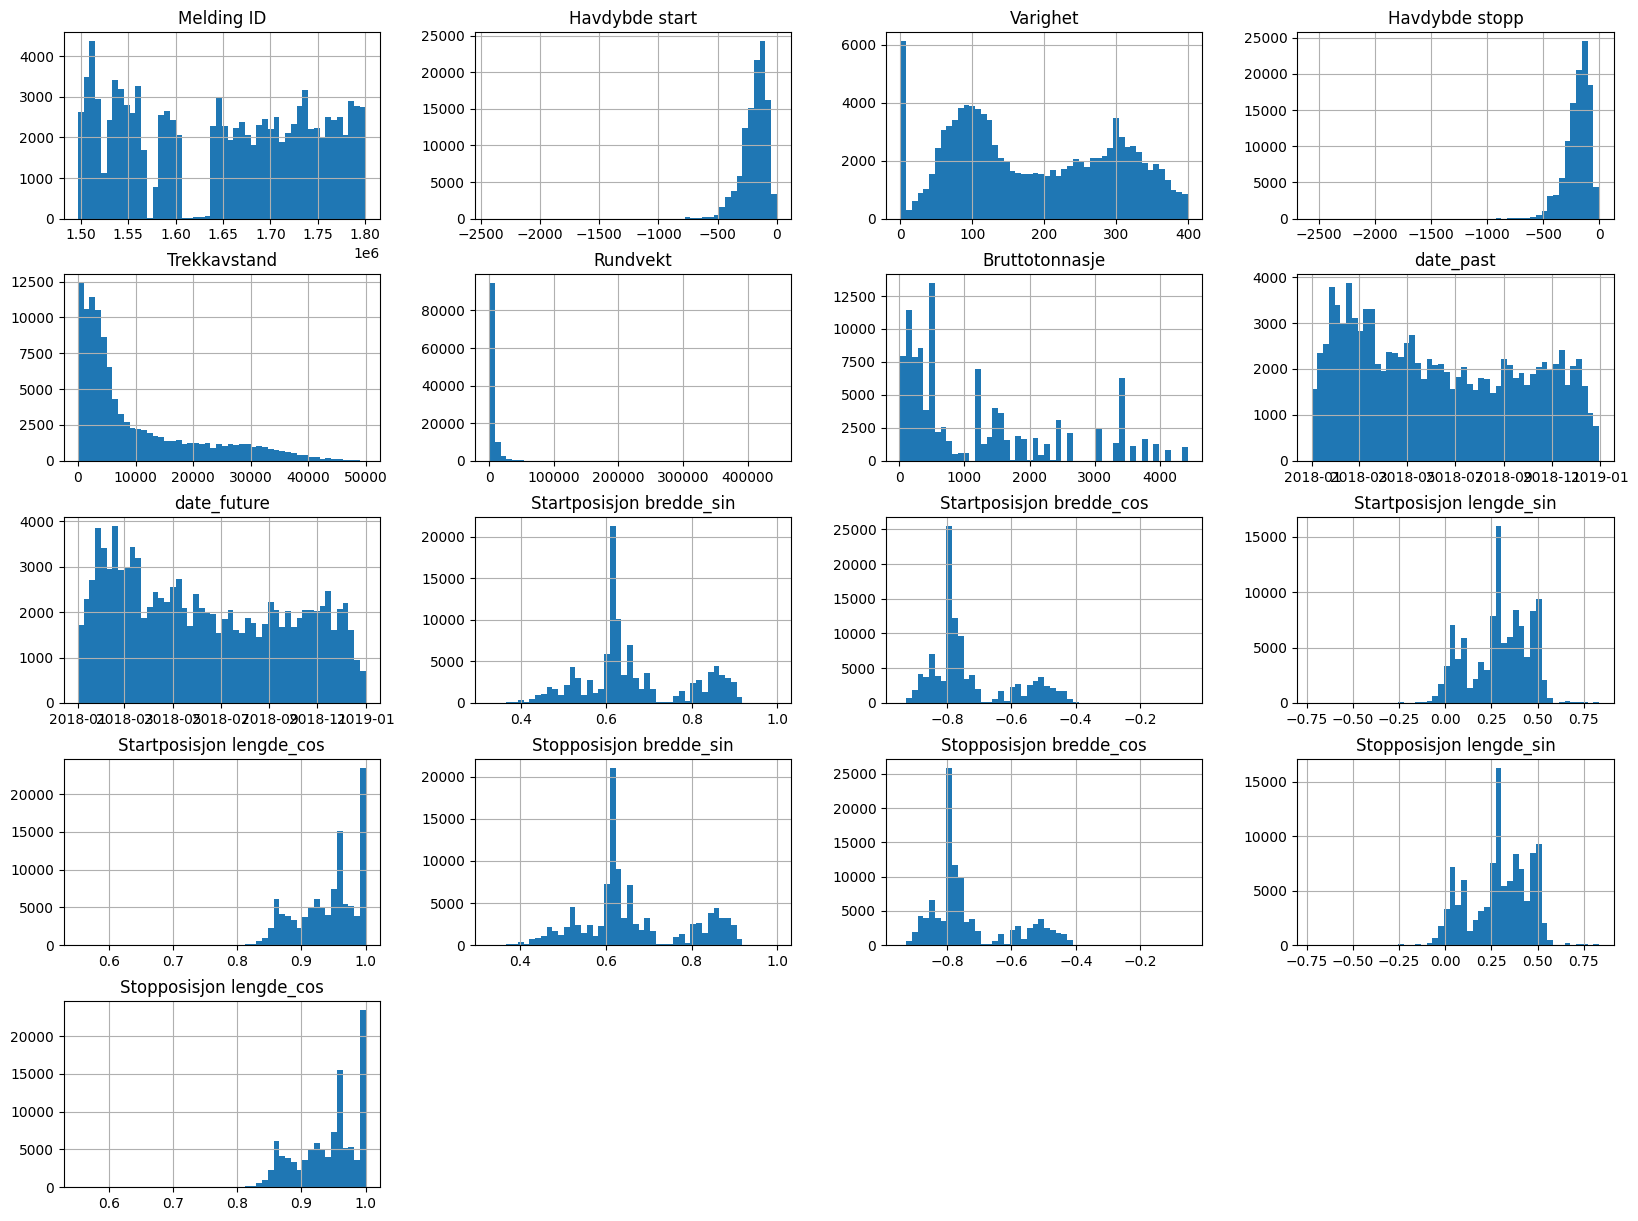

In [431]:
#looking at distribution of all numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()


Art FAO
Torsk    43757
Sei      32988
Hyse     31874
Name: count, dtype: int64


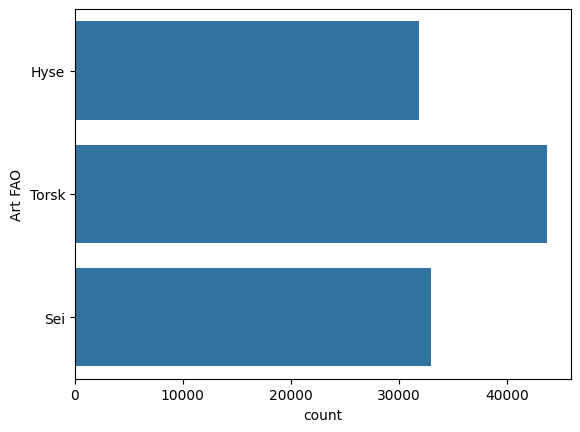

In [432]:
#counting species
print(df['Art FAO'].value_counts())
#plotting species
sns.countplot(df['Art FAO'])
plt.show()

In [433]:
#counting unique again
df.nunique()


Melding ID                  22345
Meldingstidspunkt           21249
Meldingsdato                  366
Starttidspunkt              48314
Startdato                     367
Startklokkeslett             1440
Havdybde start                710
Stopptidspunkt              48259
Stoppdato                     366
Stoppklokkeslett             1440
Varighet                      401
Havdybde stopp                757
Trekkavstand                21201
Redskap FAO                    25
Hovedart FAO                   48
Art FAO                         3
Rundvekt                    14291
Fartøylengde                  288
Bruttotonnasje                297
date_past                     366
date_future                   366
time_difference                 8
Startposisjon bredde_sin    13395
Startposisjon bredde_cos    13395
Startposisjon lengde_sin    21756
Startposisjon lengde_cos    21003
Stopposisjon bredde_sin     13479
Stopposisjon bredde_cos     13479
Stopposisjon lengde_sin     22105
Stopposisjon l

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108619 entries, 1 to 305428
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108619 non-null  int64          
 1   Meldingstidspunkt         108619 non-null  object         
 2   Meldingsdato              108619 non-null  object         
 3   Starttidspunkt            108619 non-null  object         
 4   Startdato                 108619 non-null  object         
 5   Startklokkeslett          108619 non-null  object         
 6   Havdybde start            108619 non-null  int64          
 7   Stopptidspunkt            108619 non-null  object         
 8   Stoppdato                 108619 non-null  object         
 9   Stoppklokkeslett          108619 non-null  object         
 10  Varighet                  108619 non-null  int32          
 11  Havdybde stopp            108619 non-null  int64         

In [435]:
# Pivoting table

# Pivoting table so rows that are information about the same session are put together
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")
#Startposisjon bredde_sin  108619 non-null  float64        
#  23  Startposisjon bredde_cos  108619 non-null  float64        
#  24  Startposisjon lengde_sin  108619 non-null  float64        
#  25  Startposisjon lengde_cos  108619 non-null  float64        
#  26  Stopposisjon bredde_sin   108619 non-null  float64        
#  27  Stopposisjon bredde_cos   108619 non-null  float64        
#  28  Stopposisjon lengde_sin   108619 non-null  float64        
#  29  Stopposisjon lengde_cos
df = df.pivot_table(index=['Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos', 'Havdybde start', 'Varighet', 'Havdybde stopp', 'Trekkavstand',
'Redskap FAO','Hovedart FAO','Bruttotonnasje', 'Startdato', 'Stoppdato', 'Startklokkeslett', 'Stoppklokkeslett' ],
 columns='Art FAO', values='Rundvekt', aggfunc='sum').reset_index()
df.info()
#counting nan values
df.isnull().sum().sum()
#locating nan values


Before pre-processing the dataset has 30 columns and 108619 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51076 entries, 0 to 51075
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startposisjon bredde_sin  51076 non-null  float64
 1   Startposisjon lengde_sin  51076 non-null  float64
 2   Startposisjon bredde_cos  51076 non-null  float64
 3   Startposisjon lengde_cos  51076 non-null  float64
 4   Stopposisjon bredde_sin   51076 non-null  float64
 5   Stopposisjon bredde_cos   51076 non-null  float64
 6   Stopposisjon lengde_sin   51076 non-null  float64
 7   Stopposisjon lengde_cos   51076 non-null  float64
 8   Havdybde start            51076 non-null  int64  
 9   Varighet                  51076 non-null  int32  
 10  Havdybde stopp            51076 non-null  int64  
 11  Trekkavstand              51076 non-null  int32  
 12  Redskap FAO               51076 non-null  object 
 

44625

In [436]:
df.head()

Art FAO,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Bruttotonnasje,Startdato,Stoppdato,Startklokkeslett,Stoppklokkeslett,Hyse,Sei,Torsk
0,0.325337,0.241532,-0.945598,0.970393,0.332984,-0.942932,0.243734,0.969842,-131,231,-68,26019,"Bunntrål, otter",Hyse,3723,01.10.2018,01.10.2018,14:21,18:12,900.0,NaN,426.0
1,0.328504,0.251867,-0.944503,0.967762,0.332095,-0.943246,0.267844,0.963462,-87,192,-127,21510,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,06:51,10:03,230.0,NaN,5685.0
2,0.331931,0.230848,-0.943304,0.972990,0.334794,-0.942291,0.217820,0.975989,-103,177,-179,17427,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,19:18,22:15,500.0,NaN,1132.0
3,0.332392,0.268096,-0.943141,0.963392,0.329658,-0.944101,0.264597,0.964359,-132,97,-98,10055,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,10:44,12:21,251.0,NaN,10820.0
4,0.333577,0.243463,-0.942723,0.969910,0.328570,-0.944480,0.249839,0.968287,-59,179,-91,18386,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,03:33,06:32,NaN,NaN,57.0


In [437]:
df.isnull().sum()

Art FAO
Startposisjon bredde_sin        0
Startposisjon lengde_sin        0
Startposisjon bredde_cos        0
Startposisjon lengde_cos        0
Stopposisjon bredde_sin         0
Stopposisjon bredde_cos         0
Stopposisjon lengde_sin         0
Stopposisjon lengde_cos         0
Havdybde start                  0
Varighet                        0
Havdybde stopp                  0
Trekkavstand                    0
Redskap FAO                     0
Hovedart FAO                    0
Bruttotonnasje                  0
Startdato                       0
Stoppdato                       0
Startklokkeslett                0
Stoppklokkeslett                0
Hyse                        19208
Sei                         18091
Torsk                        7326
dtype: int64

In [438]:
#using knnimputer to fill nan values in Hyse, Sei and Torsk columns
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df[['Hyse', 'Sei', 'Torsk']] = imputer.fit_transform(df[['Hyse', 'Sei', 'Torsk']])
# df.isnull().sum().sum()

#filling nan values with the median of Hyse, Sei, Torsk
# df['Hyse'] = df['Hyse'].fillna(df['Hyse'].median())
# df['Sei'] = df['Sei'].fillna(df['Sei'].median())
# df['Torsk'] = df['Torsk'].fillna(df['Torsk'].median())
# df.isnull().sum().sum()

#using MissForest to fill nan values
# from missforest.missforest import MissForest
# imputer = MissForest()
# df[['Hyse', 'Sei', 'Torsk']] = imputer.fit_transform(df[['Hyse', 'Sei', 'Torsk']])
# df.isnull().sum().sum()


#dropping nan values
# df.dropna(inplace=True)
#filling nan with 0
df.fillna(0, inplace=True)
df.isnull().sum().sum()


0

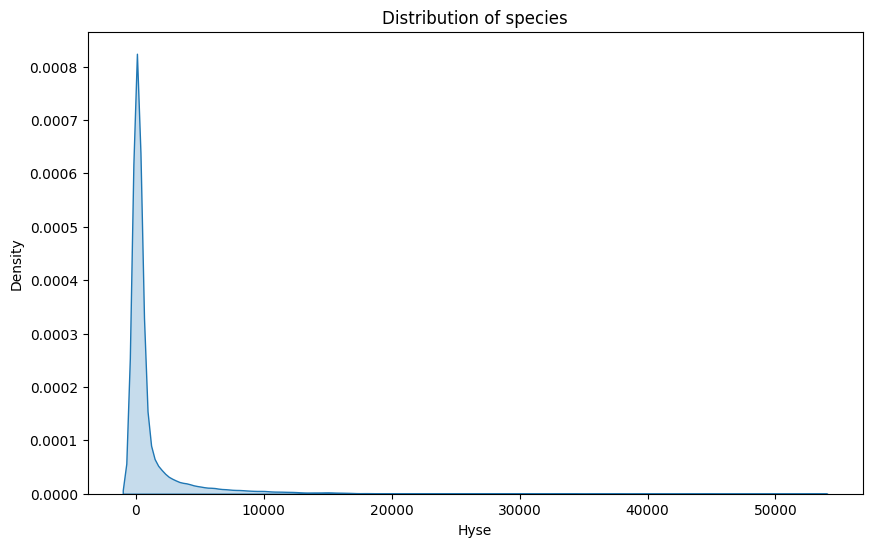

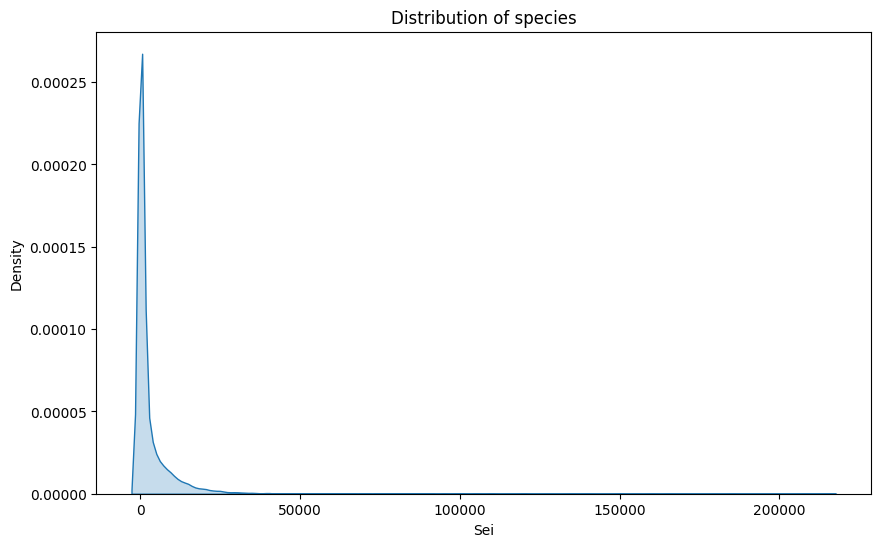

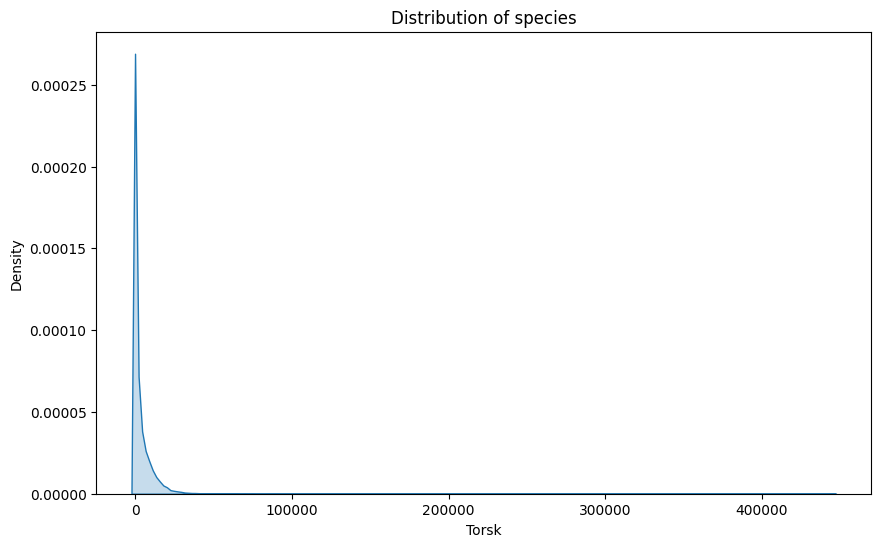

In [439]:
#plotting the distribution of the species
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Hyse'], label='Hyse', fill=True)
plt.title('Distribution of species')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sei'], label='Sei', fill=True)
plt.title('Distribution of species')

plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Torsk'], label='Torsk', fill=True)
plt.title('Distribution of species')
plt.show()

In [440]:
#counting instances of species over 15000 value
print(df[df['Hyse'] > 15000].shape)
print(df[df['Sei'] > 15000].shape)
print(df[df['Torsk'] > 15000].shape)



(564, 22)
(2389, 22)
(2860, 22)


In [441]:
print(df[df['Hyse'] > 10000].shape)
print(df[df['Sei'] > 10000].shape)
print(df[df['Torsk'] > 10000].shape)

(1364, 22)
(4450, 22)
(5936, 22)


In [442]:
#cutting off every value above 10000 in Hyse, Sei and Torsk
df = df[df['Hyse'] <= 14596]
df = df[df['Sei']  <= 14596]
df = df[df['Torsk']<= 14596]

In [443]:
#unqiue values in columns
df.nunique()

Art FAO
Startposisjon bredde_sin    12694
Startposisjon lengde_sin    20280
Startposisjon bredde_cos    12694
Startposisjon lengde_cos    19586
Stopposisjon bredde_sin     12758
Stopposisjon bredde_cos     12758
Stopposisjon lengde_sin     20546
Stopposisjon lengde_cos     19852
Havdybde start                706
Varighet                      401
Havdybde stopp                752
Trekkavstand                19814
Redskap FAO                    25
Hovedart FAO                   48
Bruttotonnasje                296
Startdato                     367
Stoppdato                     366
Startklokkeslett             1440
Stoppklokkeslett             1440
Hyse                         3964
Sei                          6236
Torsk                        7578
dtype: int64

In [444]:
#counting the dropped values after processing
print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")
df.head()

After pre-processing the dataset has 22 columns and 44782 rows


Art FAO,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Bruttotonnasje,Startdato,Stoppdato,Startklokkeslett,Stoppklokkeslett,Hyse,Sei,Torsk
0,0.325337,0.241532,-0.945598,0.970393,0.332984,-0.942932,0.243734,0.969842,-131,231,-68,26019,"Bunntrål, otter",Hyse,3723,01.10.2018,01.10.2018,14:21,18:12,900.0,0.0,426.0
1,0.328504,0.251867,-0.944503,0.967762,0.332095,-0.943246,0.267844,0.963462,-87,192,-127,21510,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,06:51,10:03,230.0,0.0,5685.0
2,0.331931,0.230848,-0.943304,0.972990,0.334794,-0.942291,0.217820,0.975989,-103,177,-179,17427,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,19:18,22:15,500.0,0.0,1132.0
3,0.332392,0.268096,-0.943141,0.963392,0.329658,-0.944101,0.264597,0.964359,-132,97,-98,10055,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,10:44,12:21,251.0,0.0,10820.0
4,0.333577,0.243463,-0.942723,0.969910,0.328570,-0.944480,0.249839,0.968287,-59,179,-91,18386,"Bunntrål, otter",Torsk,3723,01.10.2018,01.10.2018,03:33,06:32,0.0,0.0,57.0


In [445]:
from sklearn.preprocessing import MinMaxScaler
num_feat = df[['Havdybde start','Varighet', 'Havdybde stopp', 'Trekkavstand', 'Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos','Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_feat)
scaled_df = pd.DataFrame(scaled_features, columns=num_feat.columns)

In [446]:
scaled_df.head()

Art FAO,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos
0,0.946458,0.5775,0.973869,0.520651,0.000000,0.619432,0.000000,0.933945,0.006588,0.001734,0.620800,0.932743
1,0.964580,0.4800,0.950858,0.430424,0.004703,0.626071,0.001223,0.928076,0.005261,0.001383,0.636286,0.918515
2,0.957990,0.4425,0.930577,0.348721,0.009791,0.612569,0.002562,0.939739,0.009288,0.002452,0.604156,0.946452
3,0.946046,0.2425,0.962168,0.201205,0.010476,0.636496,0.002743,0.918327,0.001623,0.000425,0.634201,0.920515
4,0.976112,0.4475,0.964899,0.367911,0.012235,0.620672,0.003210,0.932869,0.000000,0.000000,0.624722,0.929276


In [447]:
#counting the instances  of each species Hyse, Sei, Torsk
print(df['Hyse'].value_counts())
print(df['Sei'].value_counts())

Hyse
0.0       16486
100.0      1060
50.0        760
200.0       692
300.0       540
          ...  
1935.0        1
1485.0        1
7038.0        1
1103.0        1
1709.0        1
Name: count, Length: 3964, dtype: int64
Sei
0.0       15944
100.0       675
50.0        542
200.0       524
1000.0      467
          ...  
3282.0        1
2962.0        1
728.0         1
3042.0        1
511.0         1
Name: count, Length: 6236, dtype: int64


In [448]:
#dbscan for clustering
from sklearn.cluster import DBSCAN


# #using dbscan
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(scaled_df)
#counting the clusters
print(dbscan.labels_)
print(np.unique(dbscan.labels_))
# 'Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos'
#plotting the clusters

#looking for relevant relations between Torsk, Sei, Hyse and coordinates
#plotting species and coordinates
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Torsk')
# plt.title('Torsk distribution in terms of coordinates')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Sei')
# plt.title('Sei distribution')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Hyse')
# plt.title('Hyse distribution')
# plt.show()

[ 0  0  0 ... -1 -1 -1]
[-1  0  1  2  3]


In [449]:
# One-hot encode the categorical features. 
from sklearn.preprocessing import OneHotEncoder
cat_feat = df[['Hovedart FAO', 'Redskap FAO','Bruttotonnasje']]
encoder = OneHotEncoder()
enc_feat= encoder.fit_transform(cat_feat)
enc_df = pd.DataFrame(enc_feat.toarray(), columns=encoder.get_feature_names_out())

# Concatonate the changed features
features = pd.concat([enc_df, scaled_df], axis=1)
# Isolate the targets
targets = df[['Hyse', 'Sei', 'Torsk']]
features.head()

,Hovedart FAO_Akkar,Hovedart FAO_Annen flyndre,Hovedart FAO_Annen marin fisk,Hovedart FAO_Annen skate og rokke,Hovedart FAO_Annen torskefisk,Hovedart FAO_Blåkveite,Hovedart FAO_Blåsteinbit,Hovedart FAO_Breiflabb,Hovedart FAO_Brisling,Hovedart FAO_Brosme,Hovedart FAO_Dypvannsreke,Hovedart FAO_Flekksteinbit,Hovedart FAO_Gapeflyndre,Hovedart FAO_Gråsteinbit,Hovedart FAO_Hakes nei. *,Hovedart FAO_Havmus,Hovedart FAO_Hestmakrell,Hovedart FAO_Hvitting,Hovedart FAO_Hyse,Hovedart FAO_Kolmule,Hovedart FAO_Kveite,Hovedart FAO_Lange,Hovedart FAO_Lodde,Hovedart FAO_Lomre,Hovedart FAO_Lyr,Hovedart FAO_Lysing,Hovedart FAO_Makrell,Hovedart FAO_Pigghå,Hovedart FAO_Pink cusk-eel*,Hovedart FAO_Reke av Pandalusslekten,Hovedart FAO_Rognkjeks (felles),Hovedart FAO_Rødspette,Hovedart FAO_Sandflyndre,Hovedart FAO_Sei,Hovedart FAO_Sild,Hovedart FAO_Sjøkreps,Hovedart FAO_Skjellbrosme,Hovedart FAO_Smørflyndre,Hovedart FAO_Snabeluer,Hovedart FAO_Steinbiter,Hovedart FAO_Strømsild,Hovedart FAO_Strømsild/Vassild,Hovedart FAO_Sølvtorsk,Hovedart FAO_Tobis og annen sil,Hovedart FAO_Torsk,Hovedart FAO_Uer (vanlig),Hovedart FAO_Vassild,Hovedart FAO_Øyepål,Redskap FAO_Andre liner,Redskap FAO_Annen trål (udefinert),Redskap FAO_Boat /vessel seines -Pair seines,Redskap FAO_Bunntrål (uspes),"Redskap FAO_Bunntrål, otter","Redskap FAO_Bunntrål, par","Redskap FAO_Bunntrål, reke",Redskap FAO_Encircling gillnets*,"Redskap FAO_Flytetrål, otter","Redskap FAO_Flytetrål, par","Redskap FAO_Flytetrål, uspesifisert",Redskap FAO_Gillnets and entangling nets (unspec)*,"Redskap FAO_Juksa/pilk, manuell",Redskap FAO_Otter dobbeltrål,"Redskap FAO_Partrål, uspesifisert",Redskap FAO_Settegarn,Redskap FAO_Setteline,Redskap FAO_Snurpenot/ringnot,"Redskap FAO_Snurpenot/ringnot, et fartøy","Redskap FAO_Snurpenot/ringnot, to fartøy",Redskap FAO_Snurrevad,"Redskap FAO_Snurrevad, dansk","Redskap FAO_Snurrevad, skotsk",Redskap FAO_Udefinert garn,Redskap FAO_Udefinert trål,Bruttotonnasje_21,Bruttotonnasje_22,Bruttotonnasje_23,Bruttotonnasje_24,Bruttotonnasje_25,Bruttotonnasje_26,Bruttotonnasje_34,Bruttotonnasje_40,Bruttotonnasje_41,Bruttotonnasje_43,Bruttotonnasje_44,Bruttotonnasje_45,Bruttotonnasje_46,Bruttotonnasje_47,Bruttotonnasje_48,Bruttotonnasje_49,Bruttotonnasje_51,Bruttotonnasje_55,Bruttotonnasje_57,Bruttotonnasje_59,Bruttotonnasje_61,Bruttotonnasje_62,Bruttotonnasje_63,Bruttotonnasje_64,Bruttotonnasje_67,Bruttotonnasje_68,Bruttotonnasje_69,Bruttotonnasje_70,Bruttotonnasje_73,Bruttotonnasje_75,Bruttotonnasje_76,Bruttotonnasje_79,Bruttotonnasje_80,Bruttotonnasje_81,Bruttotonnasje_84,Bruttotonnasje_87,Bruttotonnasje_89,Bruttotonnasje_90,Bruttotonnasje_91,Bruttotonnasje_92,Bruttotonnasje_93,Bruttotonnasje_95,Bruttotonnasje_97,Bruttotonnasje_99,Bruttotonnasje_100,Bruttotonnasje_104,Bruttotonnasje_106,Bruttotonnasje_107,Bruttotonnasje_108,Bruttotonnasje_109,Bruttotonnasje_111,Bruttotonnasje_117,Bruttotonnasje_118,Bruttotonnasje_120,Bruttotonnasje_121,Bruttotonnasje_123,Bruttotonnasje_124,Bruttotonnasje_127,Bruttotonnasje_129,Bruttotonnasje_130,Bruttotonnasje_134,Bruttotonnasje_137,Bruttotonnasje_138,Bruttotonnasje_140,Bruttotonnasje_142,Bruttotonnasje_144,Bruttotonnasje_146,Bruttotonnasje_148,Bruttotonnasje_149,Bruttotonnasje_154,Bruttotonnasje_156,Bruttotonnasje_160,Bruttotonnasje_161,Bruttotonnasje_162,Bruttotonnasje_166,Bruttotonnasje_167,Bruttotonnasje_169,Bruttotonnasje_170,Bruttotonnasje_171,Bruttotonnasje_172,Bruttotonnasje_173,Bruttotonnasje_176,Bruttotonnasje_177,Bruttotonnasje_178,Bruttotonnasje_181,Bruttotonnasje_182,Bruttotonnasje_184,Bruttotonnasje_185,Bruttotonnasje_186,Bruttotonnasje_187,Bruttotonnasje_188,Bruttotonnasje_192,Bruttotonnasje_195,Bruttotonnasje_197,Bruttotonnasje_199,Bruttotonnasje_201,Bruttotonnasje_204,Bruttotonnasje_207,Bruttotonnasje_210,Bruttotonnasje_212,Bruttotonnasje_214,Bruttotonnasje_216,Bruttotonnasje_222,Bruttotonnasje_228,Bruttotonnasje_229,Bruttotonnasje_236,Bruttotonnasje_245,Bruttotonnasje_250,Bruttotonnasje_251,Bruttotonnasje_258,Bruttotonnasje_

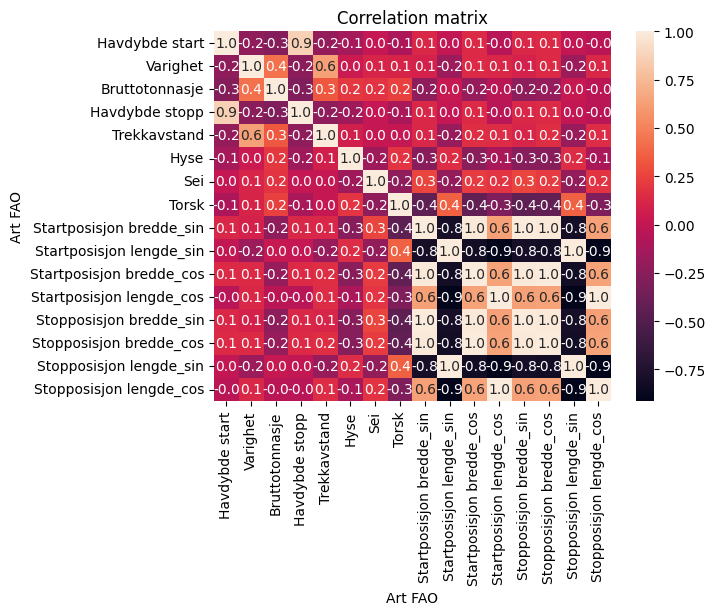

In [450]:
df_corr = df[['Havdybde start','Varighet','Bruttotonnasje', 'Havdybde stopp', 'Trekkavstand', 'Hyse', 'Sei', 'Torsk','Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos' ]]
#plotting the correlation matrix
sns.heatmap(df_corr.corr(), annot=True, fmt=".1f" ) 
plt.title('Correlation matrix')
plt.show() #the correlation matrix does not really tell us any strong relationships between relevant features. The non-linear relationships could still be useful for the model though.

#### Testing models and further exploration of data

Because decision trees are good when there is a different mix of features we have decided to use random forest to even out the downsides of single decision trees. As en extension of that we have decided to use a gradient boosting model as our second model.

In [451]:
df.shape

(44782, 22)

##### Baseline RandomForestRegressor

In [452]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(scaled_df, targets, test_size=0.02, random_state=seed)
rfr = RandomForestRegressor(n_estimators=250, max_features=25, max_depth=40)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

R2: 0.5444409740974145


##### RandomForestRegressor with onehot-encoded values + scaled

In [453]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=seed)

# After testing various parameters we chose to go with n_estimators=200, max_features=25, max_depth=40 for this dataset
# The features seemed to be best from 20 upwards. Depth was best between 25-40, from 45 it seemed to go down in performance befroe picking it up again at 70.
# We only tested up to 300 estimators, and it seemed to increase performance slightly all the way up, but for running time we are currently using 200.
rfr = RandomForestRegressor(n_estimators=250, max_features=25, max_depth=40)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_oneHot = r2_score(y_test, y_pred)
print(f"R2: {r2_oneHot}")

R2: 0.68909855273045


(44782, 381)

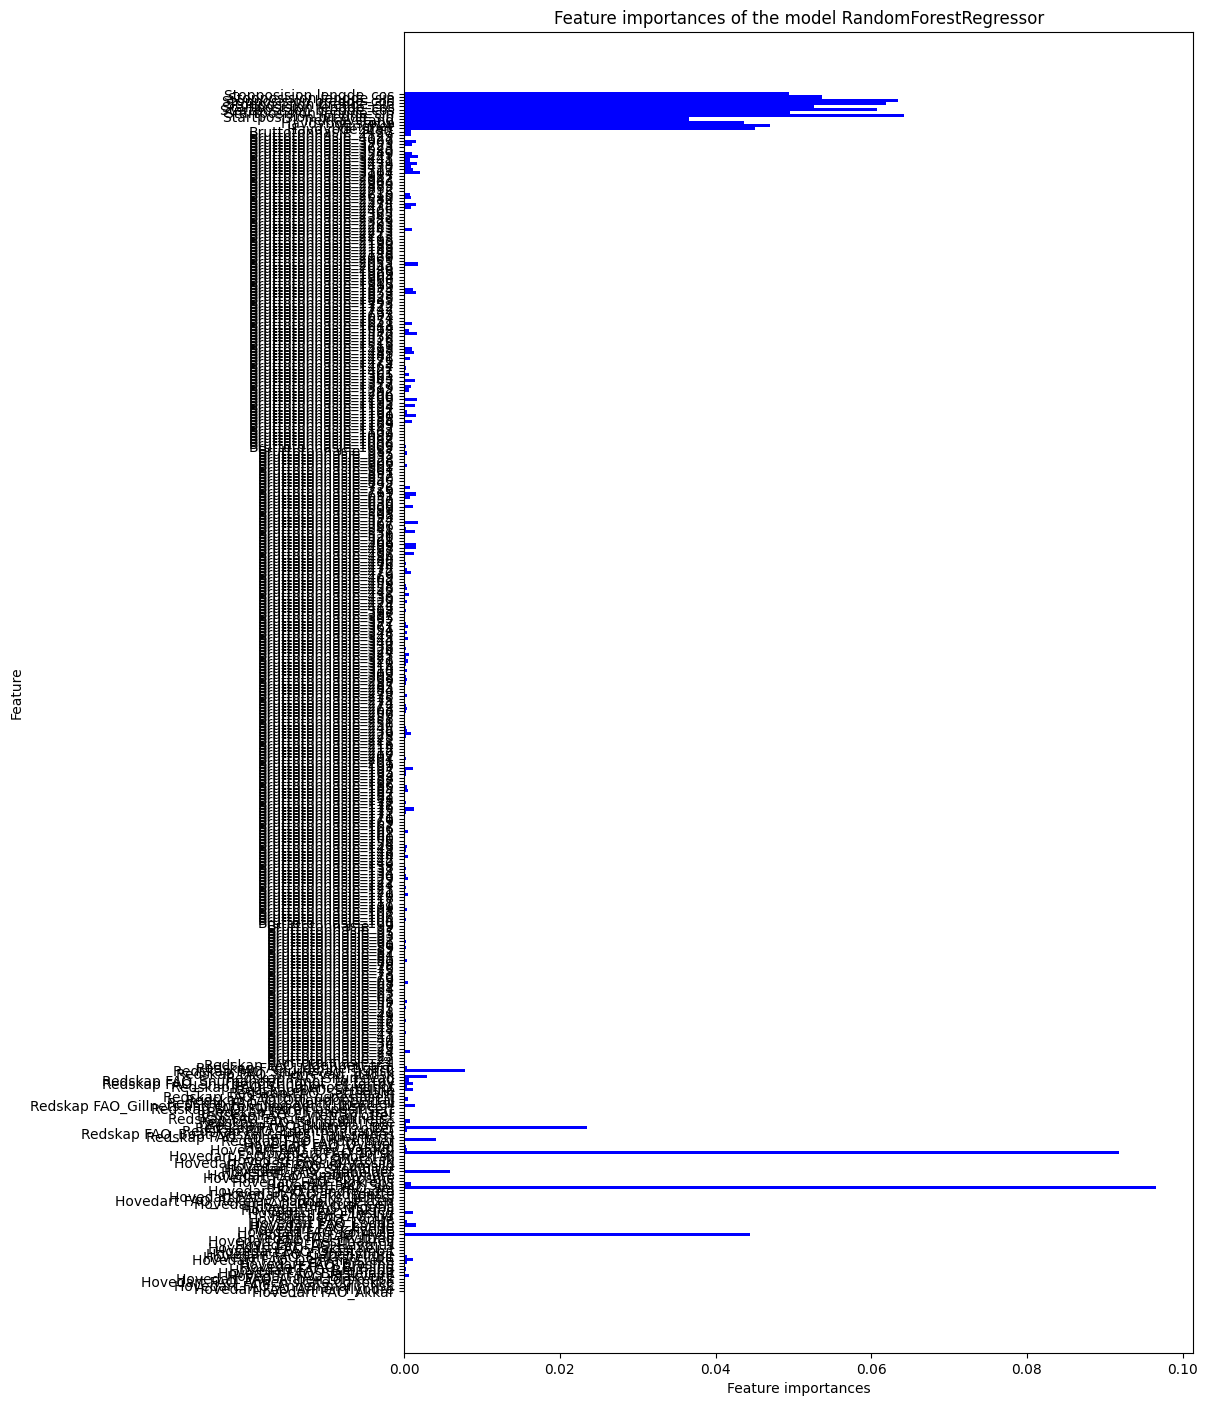

In [455]:

def plot_feature_importances(model, feature_columns):
    n_features = len(feature_columns.columns)
    feature_indices = feature_columns.columns.tolist()
    feature_importances = model.feature_importances_
    #adding if statement to remove the one-hot encoded columns that have no importance



    fig = plt.figure(figsize=(12,14))
    plt.subplot(111)
    plt.barh(range(n_features), feature_importances, height=1, color='b', align='center')
    plt.yticks(np.arange(n_features), feature_indices[:n_features])
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")
    plt.title("Feature importances of the model {}".format(model.__class__.__name__))
    plt.tight_layout(pad=0.5)
plot_feature_importances(rfr, features)


features.shape
# This graph shows the feature importance of the randomforest model.
# A lot of the one-hot encoded features seem to have no importance. We tried collapsing all the seemingly irrelevant ones into a single column.
# That seemed to worsen the R2 score from 0.637-642 to around 0.44 so we've decided to keep them for now even though this graph seems to indicate their lack of importance.

##### GradientBoostingRegressor with encoded + scaled values


In [456]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.multioutput import MultiOutputRegressor
# # From testing: putting the learning rate at 0.3 or above seems to make results worse. Setting depth over 10 seems to do the same and increase the runtime a lot.
# # We will do some more rounds of testing, but for now are settling on a depth of 7, learning rate of 0.8. Number of estimators hasent been tested yet, so for now its a standard of 100.

# X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=seed)

# base_estimator = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=seed)
        
# multioutput_regressor = MultiOutputRegressor(base_estimator)
        
# multioutput_regressor.fit(X_train, y_train)
        
# y_pred = multioutput_regressor.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2_gradient = r2_score(y_test, y_pred)
# print(f"R2: {r2_gradient}")

### Xtreme Gradient Boosting

In [457]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
#using XG boost with encoded + scaled features
# Split the data into training and testing sets
y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=seed)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.2,
                max_depth = 40, alpha = 10, n_estimators = 250, )
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
r2_xg = r2_score(y_test, preds)
print(f"R2: {r2_xg}")

KeyboardInterrupt: 

In [ ]:
# Decided to use the MLPRegressor model as the deep learning model, since it is the most relevant for our regression problem. Using one hot encoded values, continuous values and scaled values. 
from sklearn.neural_network import MLPRegressor


X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=seed)
#creating the model
model = MLPRegressor(random_state=seed, max_iter=500, verbose=True, hidden_layer_sizes=(100, 50, 25, 10), activation='relu', solver='adam', batch_size='auto', learning_rate='adaptive', learning_rate_init=0.09,shuffle=True,  early_stopping=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred.round(2))
r2_mlp = r2_score(y_test, y_pred)
print(f"R2 score: {r2_mlp}")

Iteration 1, loss = 3836315.46311111
Validation score: 0.365987
Iteration 2, loss = 2409908.66047630
Validation score: 0.555251
Iteration 3, loss = 1916041.89835782
Validation score: 0.599234
Iteration 4, loss = 1871624.06824069
Validation score: 0.560765
Iteration 5, loss = 1893944.92877014
Validation score: 0.585520
Iteration 6, loss = 1859659.38182593
Validation score: 0.596056
Iteration 7, loss = 1825015.96431019
Validation score: 0.569415
Iteration 8, loss = 1841800.23734171
Validation score: 0.609379
Iteration 9, loss = 1816271.15758302
Validation score: 0.605824
Iteration 10, loss = 1808934.78718957
Validation score: 0.609958
Iteration 11, loss = 1820384.16967307
Validation score: 0.604440
Iteration 12, loss = 1806871.55716565
Validation score: 0.568534
Iteration 13, loss = 1791155.38246280
Validation score: 0.597394
Iteration 14, loss = 1791762.49851189
Validation score: 0.617461
Iteration 15, loss = 1777535.84649868
Validation score: 0.620151
Iteration 16, loss = 1763227.40672

Text(0.5, 1.0, 'R2 scores of the models')

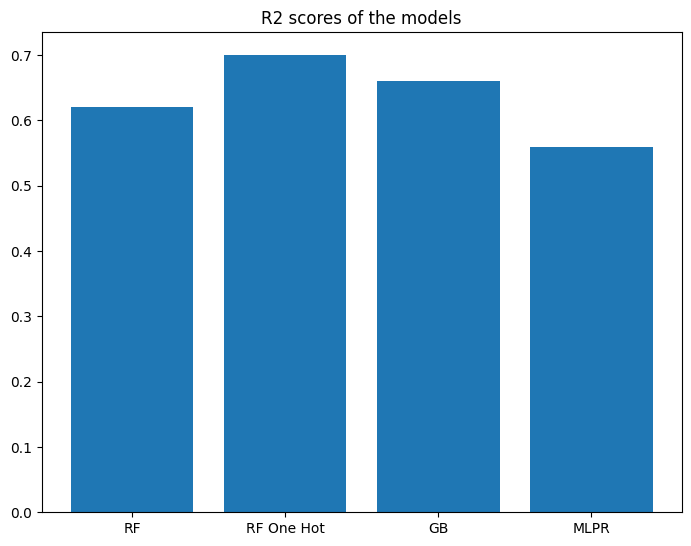

In [ ]:
#plotting all the r2 scores from each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['RF','RF One Hot', 'GB', 'MLPR']
r2_scores = [0.62,0.70,0.66,0.56]
ax.bar(models,r2_scores)
plt.title('R2 scores of the models')

##### This function is for keeping track of the models we have tested and their scores

In [ ]:
def result():
    with open('results.txt', 'w') as f:
        f.write(f"Multioutputregression: {r2_mlp}\n")
        f.write(f"RandomForest Baseline: {r2}\n")
        f.write(f"GradientBoosting: {r2_xg}\n")
        f.write(f"RandomForest One Hot: {r2_oneHot}\n") 
        # f.write(f"XGBoost: {r2_xg}\n")
result()

##### Creating our own deep learning model with pytorch

dropp kommentarer. except for tekniske ting
vise dataen underveis
dropna, påstander om hvorfor vi dropper de, bevis 
vise distribusjon av outliers
fillNA, groupBy, meldingsid, startstidspunkt
robustScaler, hvorfor vi bruker det, outliers
scalingData for modellene, forklar
gradientBoosting, scaling data hvorfor? Bedre optimum, forklare MultioutputRegressor







